In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
data = pd.read_csv("sentiment_analysis.csv")
data.head(10)

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...
5,6,1,iPhone software update fucked up my phone big ...
6,7,0,Happy for us .. #instapic #instadaily #us #son...
7,8,0,New Type C charger cable #UK http://www.ebay.c...
8,9,0,Bout to go shopping again listening to music #...
9,10,0,Photo: #fun #selfie #pool #water #sony #camera...


In [15]:
data.shape

(7920, 3)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7920 entries, 0 to 7919
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      7920 non-null   int64 
 1   label   7920 non-null   int64 
 2   tweet   7920 non-null   object
dtypes: int64(2), object(1)
memory usage: 185.8+ KB


In [17]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [18]:
data.duplicated().sum()

0

In [19]:
# Text preprocessing
import re
import string

In [20]:
# convert uppercase to lowercase
data['tweet'] = data['tweet'].str.lower()

In [21]:
data.head(10)

,id,label,tweet
0,1,0,#fingerprint #pregnancy test https://goo.gl/h1...
1,2,0,finally a transparant silicon case ^^ thanks t...
2,3,0,we love this! would you go? #talk #makememorie...
3,4,0,i'm wired i know i'm george i was made that wa...
4,5,1,what amazing service! apple won't even talk to...
5,6,1,iphone software update fucked up my phone big ...
6,7,0,happy for us .. #instapic #instadaily #us #son...
7,8,0,new type c charger cable #uk http://www.ebay.c...
8,9,0,bout to go shopping again listening to music #...
9,10,0,photo: #fun #selfie #pool #water #sony #camera...


In [22]:
# remove links

def remove_links(text):
    text = re.sub(r'http\S+', '', text)
    return text

data['tweet'] = data['tweet'].apply(lambda x: remove_links(x))

In [23]:
data.head(10)

,id,label,tweet
0,1,0,#fingerprint #pregnancy test #android #apps #...
1,2,0,finally a transparant silicon case ^^ thanks t...
2,3,0,we love this! would you go? #talk #makememorie...
3,4,0,i'm wired i know i'm george i was made that wa...
4,5,1,what amazing service! apple won't even talk to...
5,6,1,iphone software update fucked up my phone big ...
6,7,0,happy for us .. #instapic #instadaily #us #son...
7,8,0,new type c charger cable #uk … #bay #amazon #...
8,9,0,bout to go shopping again listening to music #...
9,10,0,photo: #fun #selfie #pool #water #sony #camera...


In [24]:
# Remove punctuations

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

data['tweet'] = data['tweet'].apply(lambda x: remove_punctuations(x))

In [26]:
data.tail(10)

,id,label,tweet
7910,7911,0,perfect match instagood applewatch red instagr...
7911,7912,0,i am completely in love with the new iphone em...
7912,7913,0,tune in turn on drop out gtd in one app mobi...
7913,7914,1,ok so my galaxy crashed after one day now i ha...
7914,7915,0,gain followers rt this must follow me i follow...
7915,7916,0,live out loud lol liveoutloud selfie smile son...
7916,7917,0,we would like to wish you an amazing day make ...
7917,7918,0,helping my lovely 90 year old neighbor with he...
7918,7919,0,finally got my smart pocket wifi stay connecte...
7919,7920,0,apple barcelona apple store bcn barcelona trav...


In [27]:
# Remove numbers

def remove_numbers(text):
    text = re.sub(r'\d+', '', text)
    return text

data['tweet'] = data['tweet'].apply(lambda x: remove_numbers(x))

In [29]:
data.tail(10)

,id,label,tweet
7910,7911,0,perfect match instagood applewatch red instagr...
7911,7912,0,i am completely in love with the new iphone em...
7912,7913,0,tune in turn on drop out gtd in one app mobi...
7913,7914,1,ok so my galaxy crashed after one day now i ha...
7914,7915,0,gain followers rt this must follow me i follow...
7915,7916,0,live out loud lol liveoutloud selfie smile son...
7916,7917,0,we would like to wish you an amazing day make ...
7917,7918,0,helping my lovely year old neighbor with her ...
7918,7919,0,finally got my smart pocket wifi stay connecte...
7919,7920,0,apple barcelona apple store bcn barcelona trav...


In [33]:
# Remove stopwords

import nltk

nltk.download('stopwords', download_dir="static/model")


[nltk_data] Downloading package stopwords to static/model...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [34]:
with open("static/model/corpora/stopwords/english") as f:
    stopwords = f.read().splitlines()

In [35]:
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [36]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x for x in x.split() if x not in stopwords))

In [37]:
data.head(10)

,id,label,tweet
0,1,0,fingerprint pregnancy test android apps beauti...
1,2,0,finally transparant silicon case thanks uncle ...
2,3,0,love would go talk makememories unplug relax i...
3,4,0,im wired know im george made way iphone cute d...
4,5,1,amazing service apple wont even talk question ...
5,6,1,iphone software update fucked phone big time s...
6,7,0,happy us instapic instadaily us sony xperia xp...
7,8,0,new type c charger cable uk … bay amazon etsy ...
8,9,0,bout go shopping listening music iphone justme...
9,10,0,photo fun selfie pool water sony camera picoft...


In [38]:
# Stemming

from nltk.stem import PorterStemmer
ps = PorterStemmer()

data["tweet"] = data["tweet"].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))

In [39]:
data.head(10)

,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,im wire know im georg made way iphon cute dave...
4,5,1,amaz servic appl wont even talk question unles...
5,6,1,iphon softwar updat fuck phone big time stupid...
6,7,0,happi us instap instadaili us soni xperia xperiaz
7,8,0,new type c charger cabl uk … bay amazon etsi n...
8,9,0,bout go shop listen music iphon justm music li...
9,10,0,photo fun selfi pool water soni camera picofth...


In [45]:
# Building vocabulary

from collections import Counter

vocab = Counter()

In [54]:
for sentence in data["tweet"]:
    vocab.update(sentence.split())
    

In [65]:
vocab

Counter({'fingerprint': 17,
         'pregnanc': 5,
         'test': 38,
         'android': 1244,
         'app': 1250,
         'beauti': 968,
         'cute': 968,
         'health': 362,
         'iger': 431,
         'iphoneonli': 389,
         'iphonesia': 413,
         'iphon': 12221,
         'final': 576,
         'transpar': 15,
         'silicon': 15,
         'case': 1044,
         'thank': 789,
         'uncl': 12,
         'yay': 207,
         'soni': 2457,
         'xperia': 180,
         'sonyexperias…': 3,
         'love': 1497,
         'would': 438,
         'go': 627,
         'talk': 81,
         'makememori': 3,
         'unplug': 9,
         'relax': 123,
         'smartphon': 402,
         'wifi': 150,
         'connect': 81,
         'im': 882,
         'wire': 24,
         'know': 318,
         'georg': 3,
         'made': 216,
         'way': 159,
         'daventri': 3,
         'home': 429,
         'amaz': 534,
         'servic': 153,
         'appl': 8628

In [80]:
tokens = [key for key in vocab if vocab[key]> 10]

In [81]:
len(tokens)

2711

In [83]:
# save vocabulary function

def save_vocab(tokens, filename):
    data = "\n".join(tokens)
    with open(filename, "w", encoding="utf-8") as f:
        f.write(data)
        f.close()

save_vocab(tokens, "static/model/vocab.txt")

In [84]:
# Divide dataset

x = data["tweet"]
y = data["label"]

In [86]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [89]:
X_train

862     good birthday purchas happi applewatch spacegr...
6249    iphon screw hung updat seem hung restor iphon ...
2761    sunset one minut ago samsung europ zeeland bro...
7496    yeah bb suck iphon rt mnstre love sinc ive bb ...
2141                     iphon serious go hour iphon appl
                              ...                        
4931    call android pc comput tuesdaythought appl tec...
3264                     phone suck send receiv text appl
1653    there pumpkin spice cup starbuck psl candykay ...
2607    experi magic fun fill rollercoast ride samsung...
2732    new gear who interest work soni arii magic pho...
Name: tweet, Length: 6336, dtype: object

In [90]:
# Vectorization function

def vectorize_sentences(sentences, vocab):
    vector = []
    for sentence in sentences:
        sentence_tokens = sentence.split()
        sent_vec = []
        for token in vocab:
            if token in sentence_tokens:
                sent_vec.append(1)
            else:
                sent_vec.append(0)
        vector.append(sent_vec)
    return vector

# Vectorize train and test data

X_train_vector = vectorize_sentences(X_train, tokens)
X_test_vector = vectorize_sentences(X_test, tokens)


In [98]:
y_train.value_counts()

0    4716
1    1620
Name: label, dtype: int64

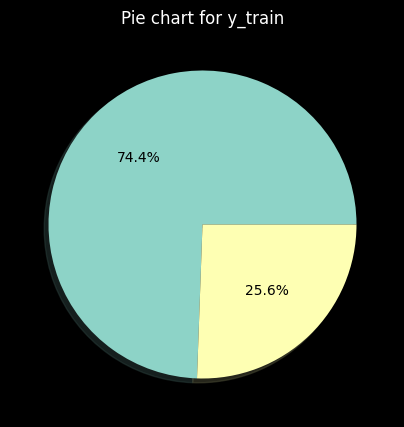

In [117]:
# plot pie chart for y_train

plt.figure(figsize=(5, 5))
plt.pie(
    y_train.value_counts(),
    labels=["Positive", "Negative"],
    autopct="%1.1f%%",
    shadow=True,
    startangle=0,
    textprops={"color": "black"}  # Set the color of percentage numbers to black
)
plt.title("Pie chart for y_train")
plt.show()

In [114]:
# Handle imbalance dataset

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_train_vector_smote, y_train_smote = smote.fit_resample(X_train_vector, y_train)

y_train_smote.value_counts()

0    4716
1    4716
Name: label, dtype: int64

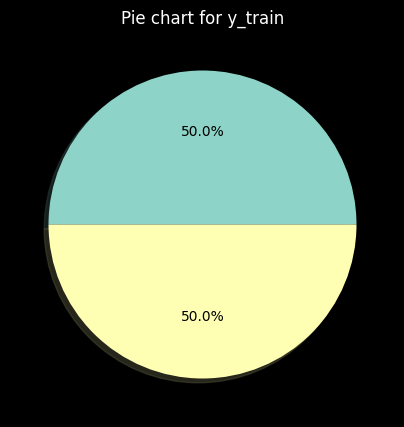

In [116]:
plt.figure(figsize=(5, 5))
plt.pie(
    y_train_smote.value_counts(),
    labels=["Positive", "Negative"],
    autopct="%1.1f%%",
    shadow=True,
    startangle=0,
    textprops={"color": "black"}  # Set the color of percentage numbers to black
)
plt.title("Pie chart for y_train")
plt.show()

In [118]:
# Model training and evaluation

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [121]:
# evaluate above model accuracy, f1 score, precision score and recall_score using function

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def evaluate_model(model_name, model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred)
    train_recall = recall_score(y_train, y_train_pred)
    
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    
    print("Model:", model_name)
    print("Train Scores:")
    print("Accuracy score: ", train_accuracy)
    print("F1 score: ", train_f1)
    print("Precision score: ", train_precision)
    print("Recall score: ", train_recall)
    print()
    print("Test Scores:")
    print("Accuracy score: ", test_accuracy)
    print("F1 score: ", test_f1)
    print("Precision score: ", test_precision)
    print("Recall score: ", test_recall)
    print("------------------------")
    
    return train_accuracy, train_f1, train_precision, train_recall, test_accuracy, test_f1, test_precision, test_recall

# Logistic Regression
lr = LogisticRegression()
lr_train_scores = evaluate_model("Logistic Regression", lr, X_train_vector_smote, y_train_smote, X_test_vector, y_test)

# Naive Bayes
nb = MultinomialNB()
nb_train_scores = evaluate_model("Naive Bayes", nb, X_train_vector_smote, y_train_smote, X_test_vector, y_test)

# Decision Tree
dt = DecisionTreeClassifier()
dt_train_scores = evaluate_model("Decision Tree", dt, X_train_vector_smote, y_train_smote, X_test_vector, y_test)

# Random Forest
rf = RandomForestClassifier()
rf_train_scores = evaluate_model("Random Forest", rf, X_train_vector_smote, y_train_smote, X_test_vector, y_test)

# Support Vector Machine
svm = SVC()
svm_train_scores = evaluate_model("Support Vector Machine", svm, X_train_vector_smote, y_train_smote, X_test_vector, y_test)



Model: Logistic Regression
Train Scores:
Accuracy score:  0.9529262086513995
F1 score:  0.9539323511101887
Precision score:  0.9339699309223892
Recall score:  0.9747667514843087

Test Scores:
Accuracy score:  0.8724747474747475
F1 score:  0.7662037037037036
Precision score:  0.722707423580786
Recall score:  0.8152709359605911
------------------------
Model: Naive Bayes
Train Scores:
Accuracy score:  0.8745759117896522
F1 score:  0.8759567998322323
Precision score:  0.8664177556523542
Recall score:  0.8857082273112807

Test Scores:
Accuracy score:  0.875
F1 score:  0.7893617021276597
Precision score:  0.6947565543071161
Recall score:  0.9137931034482759
------------------------
Model: Decision Tree
Train Scores:
Accuracy score:  0.9993638676844784
F1 score:  0.9993637327677626
Precision score:  0.9995757318625371
Recall score:  0.9991518235793045

Test Scores:
Accuracy score:  0.7904040404040404
F1 score:  0.643010752688172
Precision score:  0.5706106870229007
Recall score:  0.736453201

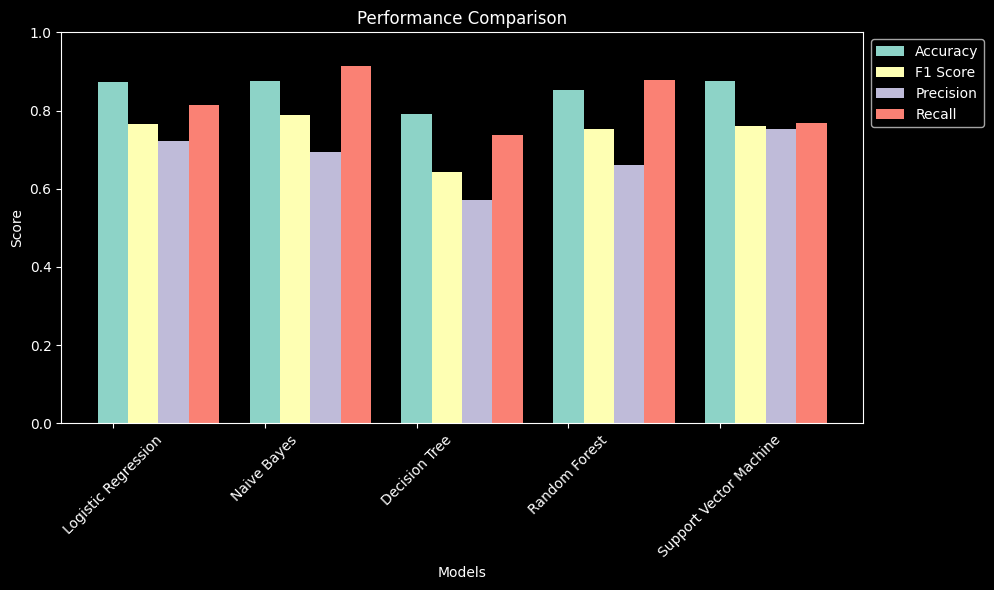

In [138]:
import matplotlib.pyplot as plt
import numpy as np

# Define the model names and their respective scores
model_names = ["Logistic Regression", "Naive Bayes", "Decision Tree", "Random Forest", "Support Vector Machine"]
accuracy_scores = [lr_train_scores[4], nb_train_scores[4], dt_train_scores[4], rf_train_scores[4], svm_train_scores[4]]
f1_scores = [lr_train_scores[5], nb_train_scores[5], dt_train_scores[5], rf_train_scores[5], svm_train_scores[5]]
precision_scores = [lr_train_scores[6], nb_train_scores[6], dt_train_scores[6], rf_train_scores[6], svm_train_scores[6]]
recall_scores = [lr_train_scores[7], nb_train_scores[7], dt_train_scores[7], rf_train_scores[7], svm_train_scores[7]]

# Create a list of score types
score_types = ["Accuracy", "F1 Score", "Precision", "Recall"]

# Create a numpy array of the scores
scores = np.array([accuracy_scores, f1_scores, precision_scores, recall_scores])

# Set the width of the bars
bar_width = 0.2

# Create the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Set the x-axis positions for the bars
x = np.arange(len(model_names))

# Plot each score type as a set of bars
for i in range(len(score_types)):
    ax.bar(x + (i * bar_width), scores[i], width=bar_width, label=score_types[i])

# Set the x-axis labels
ax.set_xticks(x)
ax.set_xticklabels(model_names, rotation=45)

# Set the y-axis limits
ax.set_ylim([0, 1])

# Set the x-axis and y-axis labels
ax.set_xlabel('Models')
ax.set_ylabel('Score')

# Set the title of the plot
ax.set_title('Performance Comparison')

# Add a legend
ax.legend(loc='upper right', bbox_to_anchor=(1.16, 1))

# Show the plot
plt.tight_layout()
plt.show()


In [186]:
# Save model

import pickle

# Save the model
with open("static/model/model.pickle", "wb") as f:
    pickle.dump(lr, f)
    
    
